# Pretrained Models

In [37]:
import torch
import torch.nn as nn

from torchvision import models
from torchvision import transforms

from PIL import Image

In [7]:
for i, model in enumerate(dir(models)):
    print(f"[{i}: {model}]", end=" ")
print()

[0: AlexNet] [1: AlexNet_Weights] [2: ConvNeXt] [3: ConvNeXt_Base_Weights] [4: ConvNeXt_Large_Weights] [5: ConvNeXt_Small_Weights] [6: ConvNeXt_Tiny_Weights] [7: DenseNet] [8: DenseNet121_Weights] [9: DenseNet161_Weights] [10: DenseNet169_Weights] [11: DenseNet201_Weights] [12: EfficientNet] [13: EfficientNet_B0_Weights] [14: EfficientNet_B1_Weights] [15: EfficientNet_B2_Weights] [16: EfficientNet_B3_Weights] [17: EfficientNet_B4_Weights] [18: EfficientNet_B5_Weights] [19: EfficientNet_B6_Weights] [20: EfficientNet_B7_Weights] [21: EfficientNet_V2_L_Weights] [22: EfficientNet_V2_M_Weights] [23: EfficientNet_V2_S_Weights] [24: GoogLeNet] [25: GoogLeNetOutputs] [26: GoogLeNet_Weights] [27: Inception3] [28: InceptionOutputs] [29: Inception_V3_Weights] [30: MNASNet] [31: MNASNet0_5_Weights] [32: MNASNet0_75_Weights] [33: MNASNet1_0_Weights] [34: MNASNet1_3_Weights] [35: MaxVit] [36: MaxVit_T_Weights] [37: MobileNetV2] [38: MobileNetV3] [39: MobileNet_V2_Weights] [40: MobileNet_V3_Large_Wei

## Image Classification

In [9]:
alexnet = models.AlexNet()
alexnet

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [14]:
resnet = models.resnet101(weights=models.ResNet101_Weights.IMAGENET1K_V1)
resnet

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [16]:
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225],
    ),
])

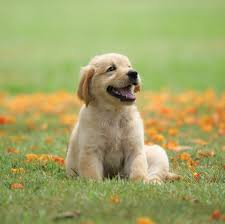

In [18]:
img = Image.open("data/puppy.jpg")
img

In [21]:
img_t = preprocess(img)

In [22]:
batch_t = torch.unsqueeze(img_t, 0)

In [23]:
resnet.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [24]:
out = resnet(batch_t)
out

tensor([[-6.5989e-01, -5.2248e-01, -3.9404e+00, -4.2981e+00, -4.1560e+00,
         -1.7669e+00, -5.4194e+00, -2.7966e+00, -1.2858e+00, -3.0311e+00,
          1.4850e+00, -9.2560e-01, -1.3978e+00, -2.1009e+00, -1.7027e+00,
         -1.0517e+00, -1.1318e+00, -1.0929e+00, -2.0344e+00, -1.6011e+00,
         -1.5603e+00, -1.1568e+00, -1.7598e+00, -1.0280e+00, -2.1083e+00,
         -5.1088e-02, -1.5554e-01, -5.1151e-01, -7.9552e-01, -9.7895e-01,
         -2.2488e+00, -2.0645e+00,  1.0173e-01, -1.4500e+00, -3.5093e-01,
         -1.5471e+00,  6.8032e-02, -2.0964e+00,  6.4600e-01, -9.8565e-02,
         -6.6247e-01,  6.6063e-01,  1.7184e+00, -2.3146e-01, -7.8224e-01,
         -5.9491e-01, -5.7279e-01,  1.3775e+00, -1.4648e+00, -2.3194e+00,
         -3.0371e+00, -6.5873e-01, -1.3524e-01, -9.7572e-01, -2.3101e+00,
         -2.1459e+00, -1.3623e+00, -6.0446e-01, -1.6378e+00, -4.3775e-02,
         -2.5976e-01, -2.3767e+00,  6.8149e-01,  1.1754e+00, -7.2948e-01,
         -8.6490e-01,  4.2101e-02, -1.

In [25]:
with open("data/imagenet_classes.txt", "r") as f:
    labels = [line.strip() for line in f.readlines()]

In [26]:
_, index = torch.max(out, 1)
index

tensor([207])

In [34]:
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
print(f"Label: {labels[index[0]]} - Confidence: {percentage[index[0]].item():.2f}%")

Label: golden retriever - Confidence: 89.64%


In [36]:
_, indices = torch.sort(out, descending=True)

for idx in indices[0][:10]:
    print(f"Label: {labels[idx]} - Confidence: {percentage[idx].item():.2f}%")

Label: golden retriever - Confidence: 89.64%
Label: Labrador retriever - Confidence: 7.07%
Label: clumber, clumber spaniel - Confidence: 0.40%
Label: Sussex spaniel - Confidence: 0.39%
Label: Tibetan terrier, chrysanthemum dog - Confidence: 0.37%
Label: cocker spaniel, English cocker spaniel, cocker - Confidence: 0.20%
Label: otterhound, otter hound - Confidence: 0.19%
Label: tennis ball - Confidence: 0.12%
Label: Brittany spaniel - Confidence: 0.12%
Label: flat-coated retriever - Confidence: 0.06%


## Generative Adversial Network

In [38]:
class ResNetBlock(nn.Module):

    def __init__(self, dim):
        super(ResNetBlock, self).__init__()
        self.conv_block = self.build_conv_block(dim)

    def build_conv_block(self, dim):
        conv_block = []

        conv_block += [nn.ReflectionPad2d(1)]

        conv_block += [nn.Conv2d(dim, dim, kernel_size=3, padding=0, bias=True),
                       nn.InstanceNorm2d(dim),
                       nn.ReLU(True)]

        conv_block += [nn.ReflectionPad2d(1)]

        conv_block += [nn.Conv2d(dim, dim, kernel_size=3, padding=0, bias=True),
                       nn.InstanceNorm2d(dim)]

        return nn.Sequential(*conv_block)

    def forward(self, x):
        out = x + self.conv_block(x)
        return out


class ResNetGenerator(nn.Module):

    def __init__(self, input_nc=3, output_nc=3, ngf=64, n_blocks=9): # <3> 

        assert(n_blocks >= 0)
        super(ResNetGenerator, self).__init__()

        self.input_nc = input_nc
        self.output_nc = output_nc
        self.ngf = ngf

        model = [nn.ReflectionPad2d(3),
                 nn.Conv2d(input_nc, ngf, kernel_size=7, padding=0, bias=True),
                 nn.InstanceNorm2d(ngf),
                 nn.ReLU(True)]

        n_downsampling = 2
        for i in range(n_downsampling):
            mult = 2**i
            model += [nn.Conv2d(ngf * mult, ngf * mult * 2, kernel_size=3,
                                stride=2, padding=1, bias=True),
                      nn.InstanceNorm2d(ngf * mult * 2),
                      nn.ReLU(True)]

        mult = 2**n_downsampling
        for i in range(n_blocks):
            model += [ResNetBlock(ngf * mult)]

        for i in range(n_downsampling):
            mult = 2**(n_downsampling - i)
            model += [nn.ConvTranspose2d(ngf * mult, int(ngf * mult / 2),
                                         kernel_size=3, stride=2,
                                         padding=1, output_padding=1,
                                         bias=True),
                      nn.InstanceNorm2d(int(ngf * mult / 2)),
                      nn.ReLU(True)]

        model += [nn.ReflectionPad2d(3)]
        model += [nn.Conv2d(ngf, output_nc, kernel_size=7, padding=0)]
        model += [nn.Tanh()]

        self.model = nn.Sequential(*model)

    def forward(self, input):
        return self.model(input)

In [48]:
netG = ResNetGenerator()

In [49]:
model_path = "data/horse2zebra_0.4.0.pth"
model_data = torch.load(model_path)
netG.load_state_dict(model_data)

<All keys matched successfully>

In [50]:
netG.eval()

ResNetGenerator(
  (model): Sequential(
    (0): ReflectionPad2d((3, 3, 3, 3))
    (1): Conv2d(3, 64, kernel_size=(7, 7), stride=(1, 1))
    (2): InstanceNorm2d(64, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (3): ReLU(inplace=True)
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (5): InstanceNorm2d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (8): InstanceNorm2d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (9): ReLU(inplace=True)
    (10): ResNetBlock(
      (conv_block): Sequential(
        (0): ReflectionPad2d((1, 1, 1, 1))
        (1): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1))
        (2): InstanceNorm2d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
        (3): ReLU(inplace=True)
        (4): ReflectionPad2d((1, 1, 1, 1))
     

In [51]:
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.ToTensor(),
])

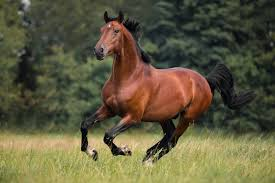

In [52]:
img = Image.open("data/horse.jpg")
img

In [53]:
img_t = preprocess(img)
batch_t = torch.unsqueeze(img_t, 0)

In [54]:
batch_out = netG(batch_t)

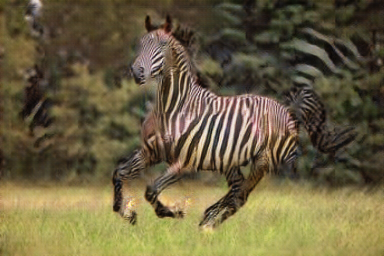

In [55]:
out_t = (batch_out.data.squeeze() + 1.0) / 2.0
out_img = transforms.ToPILImage()(out_t)
out_img.save("data/zebra.jpg")
out_img

## Image Captioning

In [69]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function


import os
import time
import json
import shutil
import argparse
import warnings

import numpy as np
from six.moves import cPickle

import opts
import models
from dataloader import *
from dataloaderraw import *
import eval_utils
import misc.utils as utils

In [70]:
warnings.filterwarnings("ignore")

In [74]:
class Options:
    def __init__(self,
                 model="./data/FC/fc-model.pth",
                 infos_path="./data/FC/fc-infos.pkl",
                 cnn_model="resnet101",
                 batch_size=0,
                 num_images=-1,
                 language_eval=0,
                 dump_images=1,
                 dump_json=1,
                 dump_path=0,
                 sample_max=1,
                 beam_size=2,
                 temperature=1.0,
                 image_folder="./data",
                 image_root="",
                 input_fc_dir="",
                 input_att_dir="",
                 input_label_h5="",
                 input_json="",
                 split="test",
                 coco_json="",
                 id=""):
        self.model = model
        self.cnn_model = cnn_model
        self.infos_path = infos_path
        self.batch_size = batch_size
        self.num_images = num_images
        self.language_eval = language_eval
        self.dump_images = dump_images
        self.dump_json = dump_json
        self.dump_path = dump_path
        self.sample_max = sample_max
        self.beam_size = beam_size
        self.temperature = temperature
        self.image_folder = image_folder
        self.image_root = image_root
        self.input_fc_dir = input_fc_dir
        self.input_att_dir = input_att_dir
        self.input_label_h5 = input_label_h5
        self.input_json = input_json
        self.split = split
        self.coco_json = coco_json
        self.id = id

opt = Options(
    model="./data/FC/fc-model.pth",
    infos_path="./data/FC/fc-infos.pkl",
    image_folder="./data/images"
)

In [75]:
cnn_model_weights = "./data/imagenet_weights/" + opt.cnn_model + ".pth"
if not os.path.isfile(cnn_model_weights):
    chunk1 = "./data/imagenet_weights/" + opt.cnn_model + "a.pth"
    chunk2 = "./data/imagenet_weights/" + opt.cnn_model + "b.pth"
    with open(cnn_model_weights,"wb") as destination:
        with open(chunk1,"rb") as source:
            shutil.copyfileobj(source, destination)
        with open(chunk2,"rb") as source:
            shutil.copyfileobj(source, destination)

# Load infos
with open(opt.infos_path, "rb") as f:
    infos = cPickle.load(f, encoding="latin1")

# override and collect parameters
if len(opt.input_fc_dir) == 0:
    opt.input_fc_dir = infos["opt"].input_fc_dir
    opt.input_att_dir = infos["opt"].input_att_dir
    opt.input_label_h5 = infos["opt"].input_label_h5
if len(opt.input_json) == 0:
    opt.input_json = infos["opt"].input_json
if opt.batch_size == 0:
    opt.batch_size = infos["opt"].batch_size
if len(opt.id) == 0:
    opt.id = infos["opt"].id
ignore = ["id", "batch_size", "beam_size", "start_from", "language_eval"]
for k in vars(infos["opt"]).keys():
    if k not in ignore:
        if k in vars(opt):
            assert vars(opt)[k] == vars(infos["opt"])[k], k + " option not consistent"
        else:
            vars(opt).update({k: vars(infos["opt"])[k]}) # copy over options from model

vocab = infos["vocab"] # ix -> word mapping

#check for GPU
device = "cuda" if torch.cuda.is_available() else "cpu"

# Setup the model
model = models.setup(opt)
model.load_state_dict(torch.load(opt.model, map_location=torch.device(device)))
model.to(device=device)
model.eval()
crit = utils.LanguageModelCriterion()

# Create the Data Loader instance
if len(opt.image_folder) == 0:
    loader = DataLoader(opt)
else:
    loader = DataLoaderRaw({"folder_path": opt.image_folder,
                            "coco_json": opt.coco_json,
                            "batch_size": opt.batch_size,
                            "cnn_model": opt.cnn_model})
# When eval using provided pretrained model, the vocab may be different from what you have in your cocotalk.json
# So make sure to use the vocab in infos file.
loader.ix_to_word = infos["vocab"]


# Set sample options
loss, split_predictions, lang_stats = eval_utils.eval_split(
    model, crit, loader,
    vars(opt))

print("loss: ", loss)
if lang_stats:
    print(lang_stats)

if opt.dump_json == 1:
    # dump the json
    json.dump(split_predictions, open("vis/vis.json", "w"))

DataLoaderRaw loading images from folder:  ./data/images
0
listing all images in directory ./data/images
DataLoaderRaw found  10  images
cp "./data/images/bird.jpg" vis/imgs/img1.jpg
image 1: a group of birds sitting on a branch
cp "./data/images/rabbits.jpg" vis/imgs/img2.jpg
image 2: a group of sheep sitting next to each other
cp "./data/images/rock.jpg" vis/imgs/img3.jpg
image 3: a man is standing on a rock in the snow
cp "./data/images/mountain.jpg" vis/imgs/img4.jpg
image 4: a view of a large mountain with a mountain in the background
cp "./data/images/horse.jpg" vis/imgs/img5.jpg
image 5: two horses are standing in a field of grass
cp "./data/images/utopia.jpg" vis/imgs/img6.jpg
image 6: a bunch of people are in a row
cp "./data/images/burger.jpg" vis/imgs/img7.jpg
image 7: a sandwich with a sandwich on a plate
cp "./data/images/puppy.jpg" vis/imgs/img8.jpg
image 8: a dog is sitting on a red leash
cp "./data/images/children.jpg" vis/imgs/img9.jpg
image 9: a group of people standi

**Note**: The visualization is available by running the following commands:

```sh
cd vis
python -m http.server 8000 --bind 127.0.0.1
```

## Torch Hub

In [76]:
from torch import hub

In [78]:
resnet18_model = hub.load("pytorch/vision:main",
                          "resnet18",
                          pretrained=True)

Downloading: "https://github.com/pytorch/vision/zipball/main" to /home/akaabdullahmateen/.cache/torch/hub/main.zip
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /home/akaabdullahmateen/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [04:25<00:00, 177kB/s] 


In [79]:
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225],
    ),
])

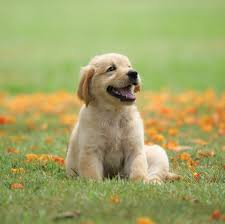

In [80]:
img = Image.open("data/puppy.jpg")
img

In [82]:
img_t = preprocess(img)
batch_t = torch.unsqueeze(img_t, 0)

In [83]:
resnet18_model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [84]:
out = resnet18_model(batch_t)
out

tensor([[ 1.2503e+00, -7.9084e-02, -1.8661e+00, -3.5283e+00, -1.0190e+00,
         -2.3982e-01, -4.3068e+00, -1.5118e+00,  8.8759e-02, -1.8856e+00,
         -1.1830e-01, -2.9244e+00, -1.2409e+00, -2.1646e+00, -6.2195e-01,
         -2.3782e+00, -1.0683e+00, -1.2785e+00, -2.6326e+00, -2.3373e+00,
          4.0222e-01, -1.6642e-01, -2.4815e+00,  4.9082e-01,  1.6338e-01,
          1.6991e+00,  2.5288e+00,  1.1138e+00,  1.8053e+00,  8.6195e-01,
         -1.3356e+00, -6.2403e-01,  1.9457e+00, -1.0904e+00,  6.9286e-01,
          1.4201e+00,  7.0961e-01, -1.0179e+00,  3.9732e-01,  2.3207e-01,
         -1.2884e-01,  8.5859e-01,  9.8650e-01,  2.8626e-01, -3.1987e-01,
         -6.1939e-01, -1.4772e+00,  2.0766e+00, -7.0963e-02, -2.1496e+00,
         -2.2044e+00, -5.2949e-01, -4.8458e-01, -9.9781e-01, -2.2413e+00,
         -1.7729e+00, -1.1663e+00, -2.5086e+00, -2.2948e+00, -2.9689e-01,
          2.2421e-01, -1.2995e+00, -6.7647e-01,  3.0295e-01,  2.3827e-01,
         -1.6518e+00,  3.2410e-01, -9.

In [85]:
with open("data/imagenet_classes.txt", "r") as f:
    labels = [line.strip() for line in f.readlines()]

_, indices = torch.sort(out, descending=True)

for idx in indices[0][:10]:
    print(f"Label: {labels[idx]} - Confidence: {percentage[idx].item():.2f}%")

Label: golden retriever - Confidence: 89.64%
Label: Labrador retriever - Confidence: 7.07%
Label: standard poodle - Confidence: 0.05%
Label: Tibetan terrier, chrysanthemum dog - Confidence: 0.37%
Label: miniature poodle - Confidence: 0.03%
Label: clumber, clumber spaniel - Confidence: 0.40%
Label: Dandie Dinmont, Dandie Dinmont terrier - Confidence: 0.03%
Label: kuvasz - Confidence: 0.06%
Label: otterhound, otter hound - Confidence: 0.19%
Label: Bedlington terrier - Confidence: 0.01%
